In [72]:
import numpy as np
from scipy.stats import invwishart, invgamma

from tqdm.notebook import tqdm
from scipy.special import gamma 
from scipy.optimize import minimize

In [73]:
np.random.seed(42)

In [74]:
true_cov = np.array([[1,0],[0,2]])

def generate_samples(n):
    # size = nx2
    mean = np.array([0,0])
    cov = np.array([[1,0],[0,2]])

    samples = np.random.multivariate_normal(mean,cov,size=n)
    return samples

In [75]:
n10 = generate_samples(10)
n100 = generate_samples(100)
n1000 = generate_samples(1000)

In [76]:
def get_error(samples, estimate):
    return np.linalg.norm(samples - estimate)

## Ques - 1 : MLE

In [77]:
def mle_estimate(samples):
    return samples.T@samples/len(samples)

In [78]:
mle_n10 = mle_estimate(n10)
mle_n100 = mle_estimate(n100)
mle_n1000 = mle_estimate(n1000)

# print(f"  Estimate  \t|\t Error \n")
print(f"N10 estimate : {mle_n10[0]} \n \t\t{mle_n10[1]} \t", f"Error : {get_error(true_cov, mle_n10)}" , "\n")
print(f"N100 estimate : {mle_n100[0]} \n \t\t{mle_n100[1]} \t", f"Error : {get_error(true_cov, mle_n100)}", "\n")
print(f"N1000 estimate : {mle_n1000[0]} \n \t\t{mle_n1000[1]} \t", f"Error : {get_error(true_cov, mle_n1000)}" , "\n")  

N10 estimate : [0.95639504 0.5114831 ] 
 		[0.5114831  1.70687007] 	 Error : 0.78170100869855 

N100 estimate : [1.09090575 0.06765193] 
 		[0.06765193 1.42585811] 	 Error : 0.5891148760120036 

N1000 estimate : [ 1.00312518 -0.00914911] 
 		[-0.00914911  1.92430787] 	 Error : 0.07685361366732414 



### Ques - 2 : Bayesian Est with Conjugate Prior

In [79]:
def bayesian_estimate_invwishart_cp(samples):
    n = len(samples)
    v0 = 5
    delta0 = np.array([[4,0],[0,5]])
    d = 1
    dof = n + v0
    scale = delta0 + samples.T@samples
    
    # return analytical mean of posterior
    return scale/(dof-d-1)

In [80]:
bayes_invwis_n10 = bayesian_estimate_invwishart_cp(n10)
bayes_invwis_n100 = bayesian_estimate_invwishart_cp(n100)
bayes_invwis_n1000 = bayesian_estimate_invwishart_cp(n1000)

# print(f"  Estimate  \t|\t Error \n")
print(f"N10 estimate : {bayes_invwis_n10[0]} \n \t\t{bayes_invwis_n10[1]} \t", f"Error : {get_error(true_cov, bayes_invwis_n10)}" , "\n")
print(f"N100 estimate : {bayes_invwis_n100[0]} \n \t\t{bayes_invwis_n100[1]} \t", f"Error : {get_error(true_cov, bayes_invwis_n100)}", "\n")
print(f"N1000 estimate : {bayes_invwis_n1000[0]} \n \t\t{bayes_invwis_n1000[1]} \t", f"Error : {get_error(true_cov, bayes_invwis_n1000)}" , "\n")  

N10 estimate : [1.0433808  0.39344854] 
 		[0.39344854 1.69759236] 	 Error : 0.6347722240374717 

N100 estimate : [1.09796675 0.06568148] 
 		[0.06568148 1.43287195] 	 Error : 0.5829749793964033 

N1000 estimate : [ 1.00411284 -0.00912175] 
 		[-0.00912175  1.92353726] 	 Error : 0.07765229561546912 



### Ques - 3 : Bayesian Est with Non-informative Prior

In [81]:
def bayesian_estimate_jeffery(samples):
    # https://tminka.github.io/papers/minka-gaussian.pdf
    n = len(samples)
    d = 1
    dof = n
    scale = samples.T@samples
    
    # return analytical mean of posterior
    return scale/(dof-d-1)

def bayesian_estimate_ind_jeffery(samples):
    # gelman page 72
    n = len(samples)
    d = 1
    dof = n - 1
    scale = samples.T@samples
    
    # return analytical mean of posterior
    return scale/(dof-d-1)

In [82]:
jeffery_n10 = bayesian_estimate_jeffery(n10)
jeffery_n100 = bayesian_estimate_jeffery(n100)
jeffery_n1000 = bayesian_estimate_jeffery(n1000)

# print(f"  Estimate  \t|\t Error \n")
print(f"N10 estimate : {jeffery_n10[0]} \n \t\t{jeffery_n10[1]} \t", f"Error : {get_error(true_cov, jeffery_n10)}" , "\n")
print(f"N100 estimate : {jeffery_n100[0]} \n \t\t{jeffery_n100[1]} \t", f"Error : {get_error(true_cov, jeffery_n100)}", "\n")
print(f"N1000 estimate : {jeffery_n1000[0]} \n \t\t{jeffery_n1000[1]} \t", f"Error : {get_error(true_cov, jeffery_n1000)}" , "\n") 
print("\n")

jeffery_ind_n10 = bayesian_estimate_ind_jeffery(n10)
jeffery_ind_n100 = bayesian_estimate_ind_jeffery(n100)
jeffery_ind_n1000 = bayesian_estimate_ind_jeffery(n1000)

# print(f"  Estimate  \t|\t Error \n")
print(f"N10 estimate : {jeffery_ind_n10[0]} \n \t\t{jeffery_ind_n10[1]} \t", f"Error : {get_error(true_cov, jeffery_ind_n10)}" , "\n")
print(f"N100 estimate : {jeffery_ind_n100[0]} \n \t\t{jeffery_ind_n100[1]} \t", f"Error : {get_error(true_cov, jeffery_ind_n100)}", "\n")
print(f"N1000 estimate : {jeffery_ind_n1000[0]} \n \t\t{jeffery_ind_n1000[1]} \t", f"Error : {get_error(true_cov, jeffery_ind_n1000)}" , "\n")  

N10 estimate : [1.1954938  0.63935387] 
 		[0.63935387 2.13358758] 	 Error : 0.9346711809305068 

N100 estimate : [1.11316913 0.06903258] 
 		[0.06903258 1.45495725] 	 Error : 0.5651635564589236 

N1000 estimate : [ 1.00513545 -0.00916745] 
 		[-0.00916745  1.9281642 ] 	 Error : 0.07317676920946582 



N10 estimate : [1.36627863 0.73069014] 
 		[0.73069014 2.43838581] 	 Error : 1.180744813626069 

N100 estimate : [1.1246451  0.06974426] 
 		[0.06974426 1.46995681] 	 Error : 0.5533630885390415 

N1000 estimate : [ 1.00614361 -0.00917664] 
 		[-0.00917664  1.93009816] 	 Error : 0.07136127951600006 



### Ques 4 : MC Bayesian Est

In [98]:
def mc_bayesian_a(samples):
    n = len(samples)
    v0 = 5
    delta0 = np.array([[4,0],[0,5]])
    vals = []

    for m in [1e3, 1e4, 1e5]:
        numerators = []
        denominators = []
        for _ in range(int(m)):
            sigma_j = invwishart.rvs(v0,delta0)


            det_term = np.linalg.det(sigma_j)**(-n/2)
            det_term = np.clip(det_term, 1e-100, 1e100)

            exp_term = np.exp(np.clip(-0.5*np.trace(np.linalg.inv(sigma_j)@(samples.T@samples)), 1e-100, 1e100))
            numerators.append(sigma_j*det_term*exp_term)
            denominators.append(det_term*exp_term)

        print(f"For m={m}:")
        vals.append(np.array(numerators).mean(axis=0)/np.mean(denominators))
        print(np.array(numerators).mean(axis=0)/np.mean(denominators))
        print("\n")
    
    return np.array(vals)

def mc_bayesian_b(samples):
    n = len(samples)
    v0 = 5
    delta0 = np.array([[2,0],[0,4]])
    vals = []

    for m in [1e3, 1e4, 1e5]:
        numerators = []
        denominators = []
        for _ in range(int(m)):
            sigma_j = invwishart.rvs(v0,delta0)
            
            det_term = np.linalg.det(sigma_j)**(-n/2)
            det_term = np.clip(det_term, 1e-100, 1e100)

            exp_term = np.exp(np.clip(-0.5*np.trace(np.linalg.inv(sigma_j)@(samples.T@samples)), 1e-100, 1e100))
            numerators.append(sigma_j*det_term*exp_term)
            denominators.append(det_term*exp_term)

        # print(f"For m={m}:")
        vals.append(np.array(numerators).mean(axis=0)/np.mean(denominators))
        # print(np.array(numerators).mean(axis=0)/np.mean(denominators))
        # print("\n")
    
    return np.array(vals)


In [99]:
mc_a_n10 = mc_bayesian_a(n10)
mc_a_n100 = mc_bayesian_a(n100)
mc_a_n1000 = mc_bayesian_a(n1000)

# print(f"  Estimate  \t|\t Error \n")
print(f"N10 estimate : {mc_a_n10[0]} \n \t\t{mc_a_n10[1]} \t", f"Error : {[get_error(true_cov, x) for x in mc_a_n10] }" , "\n")
print(f"N100 estimate : {mc_a_n100[0]} \n \t\t{mc_a_n100[1]} \t", f"Error : {[get_error(true_cov, x) for x in mc_a_n100]}", "\n")
print(f"N1000 estimate : {mc_a_n1000[0]} \n \t\t{mc_a_n1000[1]} \t", f"Error : {[get_error(true_cov, x) for x in mc_a_n1000]}" , "\n") 
print("\n")

mc_b_n10 =  mc_bayesian_b(n10)
mc_b_n100 =  mc_bayesian_b(n100)
mc_b_n1000 =  mc_bayesian_b(n1000)

# print(f"  Estimate  \t|\t Error \n")
print(f"N10 estimate : {mc_b_n10[0]} \n \t\t{mc_b_n10[1]} \t", f"Error : {[get_error(true_cov, x) for x in mc_b_n10]}" , "\n")
print(f"N100 estimate : {mc_b_n100[0]} \n \t\t{mc_b_n100[1]} \t", f"Error : {[get_error(true_cov, x) for x in mc_b_n100]}", "\n")
print(f"N1000 estimate : {mc_b_n1000[0]} \n \t\t{mc_b_n1000[1]} \t", f"Error : {[get_error(true_cov, x) for x in mc_b_n1000]}" , "\n")  

For m=1000.0:
[[ 0.42129131 -0.05570106]
 [-0.05570106  0.55658186]]


For m=10000.0:
[[0.35406946 0.02864073]
 [0.02864073 0.42277761]]


For m=100000.0:
[[ 0.35523343 -0.01397862]
 [-0.01397862  0.43682538]]


For m=1000.0:
[[ 0.45756342 -0.05679105]
 [-0.05679105  0.29806271]]


For m=10000.0:
[[ 0.28990321 -0.03090174]
 [-0.03090174  0.3200495 ]]


For m=100000.0:
[[0.29938395 0.03149522]
 [0.03149522 0.19033859]]




C:\Users\aksha\AppData\Local\Temp\ipykernel_22688\514092026.py:14: RuntimeWarning: overflow encountered in scalar power
  det_term = np.linalg.det(sigma_j)**(-n/2)


For m=1000.0:
[[ 0.67337575 -0.02885583]
 [-0.02885583  0.8390366 ]]


For m=10000.0:
[[ 0.66554155 -0.00359107]
 [-0.00359107  0.80894623]]


For m=100000.0:
[[0.65994007 0.00188641]
 [0.00188641 0.82422498]]


N10 estimate : [[ 0.42129131 -0.05570106]
 [-0.05570106  0.55658186]] 
 		[[0.35406946 0.02864073]
 [0.02864073 0.42277761]] 	 Error : [1.5571014364427667, 1.704845249146786, 1.6910439498727463] 

N100 estimate : [[ 0.45756342 -0.05679105]
 [-0.05679105  0.29806271]] 
 		[[ 0.28990321 -0.03090174]
 [-0.03090174  0.3200495 ]] 	 Error : [1.7880935231813204, 1.8243850956385712, 1.9410618648454727] 

N1000 estimate : [[ 0.67337575 -0.02885583]
 [-0.02885583  0.8390366 ]] 
 		[[ 0.66554155 -0.00359107]
 [-0.00359107  0.80894623]] 	 Error : [1.2067247976470958, 1.2371327029785302, 1.2239668159318635] 





C:\Users\aksha\AppData\Local\Temp\ipykernel_22688\514092026.py:40: RuntimeWarning: overflow encountered in scalar power
  det_term = np.linalg.det(sigma_j)**(-n/2)


N10 estimate : [[0.16371264 0.01864841]
 [0.01864841 0.31191436]] 
 		[[0.13352261 0.00280176]
 [0.00280176 0.31742649]] 	 Error : [1.8840661373271026, 1.892578233570864, 1.8687357966899243] 

N100 estimate : [[0.14848515 0.02668915]
 [0.02668915 0.26057462]] 
 		[[ 0.16338485 -0.03012443]
 [-0.03012443  0.20083881]] 	 Error : [1.9370345433066758, 1.9846210844515197, 2.004904615297301] 

N1000 estimate : [[0.46068712 0.01947195]
 [0.01947195 0.9643173 ]] 
 		[[0.4830285  0.00424663]
 [0.00424663 0.94960993]] 	 Error : [1.1680134248446845, 1.1707326338567143, 1.171248389323076] 



### Ques - 5 : Gibbs sampling

In [85]:
def gibbs_sampler(samples):
    n = len(samples)
    d = 2
    v = 5 # to be checked
    iter = 1e5
    A_1 = 0.05
    A_2 = 0.05

    a1 = invgamma.rvs(0.5, scale = 1/(A_1**2))
    a2 = invgamma.rvs(0.5, scale = 1/(A_1**2))
    
    sigmas = []
    for i in tqdm(range(int(iter))):
        if i%2 == 0:
            sigma = invwishart.rvs(v+d+n-1, 2*v*np.array([[1/a1,0],[0,1/a2]])+samples.T@samples)
            sigmas.append(sigma)
        else:
            a1 = invgamma.rvs((v+n)/2,scale=v*(np.linalg.inv(sigma)[0][0])+1/(A_1**2))
            a2 = invgamma.rvs((v+n)/2,scale=v*(np.linalg.inv(sigma)[1][1])+1/(A_2**2))
    
    return np.array(sigmas[-1000:]).mean(axis=0)

In [86]:
gibbs_n10 = gibbs_sampler(n10)
gibbs_n100 = gibbs_sampler(n100)
gibbs_n1000 = gibbs_sampler(n1000)

# print(f"  Estimate  \t|\t Error \n")
print(f"N10 estimate : {gibbs_n10[0]} \n \t\t{gibbs_n10[1]} \t", f"Error : {get_error(true_cov, gibbs_n10)}" , "\n")
print(f"N100 estimate : {gibbs_n100[0]} \n \t\t{gibbs_n100[1]} \t", f"Error : {get_error(true_cov, gibbs_n100)}", "\n")
print(f"N1000 estimate : {gibbs_n1000[0]} \n \t\t{gibbs_n1000[1]} \t", f"Error : {get_error(true_cov, gibbs_n1000)}" , "\n") 
print("\n")

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

N10 estimate : [0.76632492 0.38759382] 
 		[0.38759382 1.29560019] 	 Error : 0.9226272699390545 

N100 estimate : [1.07416067 0.07000914] 
 		[0.07000914 1.39106728] 	 Error : 0.6213705981750641 

N1000 estimate : [ 1.01225181 -0.01014911] 
 		[-0.01014911  1.93534939] 	 Error : 0.06734847862152363 





### Ques 6 : Empirical Bayes

In [87]:
def gammafn(x,d):
    init = np.pi**(d*(d-1)/4)
    for i in range(1,d+1):
        init *= gamma(x + (1-i)/2)
        init = np.clip(init, -1e30, 1e30)
    return init

def objective_function_voptimal(v,n,d):
    v = np.clip(v, 1e-30, 1e30)
    term_1 = v*np.log((v+n)/v)
    term_2 = n*np.log((v+n)/n)
    # print((v+n)/v , "v")
    term_3 = np.log(np.clip(gammafn(v/2,d)/gammafn((v+n)/2,d), 1e-30, 1e30))
    return term_1 + term_2 + term_3

def EmpiricalBayes(samples,v0):
    n,d = samples.shape
    v_opt = minimize(lambda x: objective_function_voptimal(x,n,d), v0)
    del_opt = v_opt.x[0]/n * samples.T@samples
    #  InvWishart(νopt + n,∆opt + Σn) Calculate the posterior mean
    posterior_mean = (del_opt + samples.T@samples ) / (v_opt.x[0] + n - d - 1)
    return posterior_mean


In [88]:
# print(f"For n = 10 \n{EmpiricalBayes(n10,5)}")
# print(f"For n = 100 \n{EmpiricalBayes(n100,5)}")
# print(f"For n = 1000 \n{EmpiricalBayes(n1000,5)}")

empirical_bayes_n10 = EmpiricalBayes(n10, 5)
empirical_bayes_n100 = EmpiricalBayes(n100, 5)
empirical_bayes_n1000 = EmpiricalBayes(n1000, 5)

# print(f"  Estimate  \t|\t Error \n")
print(f"N10 estimate : {empirical_bayes_n10[0]} \n \t\t{empirical_bayes_n10[1]} \t", f"Error : {get_error(true_cov, empirical_bayes_n10)}" , "\n")
print(f"N100 estimate : {empirical_bayes_n100[0]} \n \t\t{empirical_bayes_n100[1]} \t", f"Error : {get_error(true_cov, empirical_bayes_n100)}", "\n")
print(f"N1000 estimate : {empirical_bayes_n1000[0]} \n \t\t{empirical_bayes_n1000[1]} \t", f"Error : {get_error(true_cov, empirical_bayes_n1000)}" , "\n")  

N10 estimate : [1.04157568 0.55703797] 
 		[0.55703797 1.85889121] 	 Error : 0.8013880606137168 

N100 estimate : [1.1246625  0.06974534] 
 		[0.06974534 1.46997955] 	 Error : 0.5533454958740844 

N1000 estimate : [ 1.00614376 -0.00917664] 
 		[-0.00917664  1.93009845] 	 Error : 0.07136100844284828 



## Code without outputs

In [89]:
np.random.seed(42)

In [90]:
def generate_samples(n):
    # size = nx2
    mean = np.array([0,0])
    cov = np.array([[1,0],[0,2]])

    samples = np.random.multivariate_normal(mean,cov,size=n)
    return samples

In [140]:
n10 = generate_samples(10)
n100 = generate_samples(100)
n1000 = generate_samples(500)

### Ques - 1 : MLE

In [92]:
def mle_estimate(samples):
    return samples.T@samples/len(samples)

### Ques - 2 : Bayesian Est with Conjugate Prior

In [93]:
def bayesian_estimate_invwishart_cp(samples):
    n = len(samples)
    v0 = 5
    delta0 = np.array([[4,0],[0,5]])
    d = 1
    dof = n + v0
    scale = delta0 + samples.T@samples
    
    # return analytical mean of posterior
    return scale/(dof-d-1)

In [126]:
bayesian_estimate_invwishart_cp(n1000)

array([[ 1.00411284, -0.00912175],
       [-0.00912175,  1.92353726]])

### Ques - 3 : Bayesian Est with Non-informative Prior

In [94]:
def bayesian_estimate_jeffery(samples):
    # https://tminka.github.io/papers/minka-gaussian.pdf
    n = len(samples)
    d = 1
    dof = n
    scale = samples.T@samples
    
    # return analytical mean of posterior
    return scale/(dof-d-1)

def bayesian_estimate_ind_jeffery(samples):
    # gelman page 72
    n = len(samples)
    d = 1
    dof = n - 1
    scale = samples.T@samples
    
    # return analytical mean of posterior
    return scale/(dof-d-1)

### Ques 4 : MC Bayesian Est

In [141]:
def mc_bayesian_a(samples):
    n = len(samples)
    v0 = 5
    delta0 = np.array([[4,0],[0,5]])
    cov_matrix = samples.T@samples
    for m in [1e3, 1e4, 1e5]:
        numerators = []
        denominators = []
        for _ in range(int(m)):
            sigma_j = invwishart.rvs(v0,delta0)
            det_term = np.linalg.det(sigma_j)**(-n/2)
            exp_term = np.exp(-0.5*np.trace(np.linalg.inv(sigma_j)@(cov_matrix)))
            numerators.append(sigma_j*det_term*exp_term)
            denominators.append(det_term*exp_term)

        print(f"For m={m}:\n")
        print(np.array(numerators).mean(axis=0)/np.mean(denominators))

def mc_bayesian_b(samples):
    n = len(samples)
    v0 = 5
    delta0 = np.array([[2,0],[0,4]])

    for m in [1e3, 1e4, 1e5]:
        numerators = []
        denominators = []
        for _ in range(int(m)):
            sigma_j = invwishart.rvs(v0,delta0)
            det_term = np.linalg.det(sigma_j)**(-n/2)
            exp_term = np.exp(-0.5*np.trace(np.linalg.inv(sigma_j)@(samples.T@samples)))
            numerators.append(sigma_j*det_term*exp_term)
            denominators.append(det_term*exp_term)

        print(f"For m={m}:\n")
        print(np.array(numerators).mean(axis=0)/np.mean(denominators))


In [142]:
mc_bayesian_a(n1000)

For m=1000.0:

[[ 1.03729055 -0.03314606]
 [-0.03314606  2.06666036]]


C:\Users\aksha\AppData\Local\Temp\ipykernel_22688\2642150634.py:11: RuntimeWarning: overflow encountered in scalar power
  det_term = np.linalg.det(sigma_j)**(-n/2)
C:\Users\aksha\AppData\Local\Temp\ipykernel_22688\2642150634.py:13: RuntimeWarning: invalid value encountered in multiply
  numerators.append(sigma_j*det_term*exp_term)
C:\Users\aksha\AppData\Local\Temp\ipykernel_22688\2642150634.py:14: RuntimeWarning: invalid value encountered in scalar multiply
  denominators.append(det_term*exp_term)


For m=10000.0:

[[nan nan]
 [nan nan]]


KeyboardInterrupt: 

In [120]:
mc_bayesian_a(n1000)

AttributeError: module 'numpy.linalg' has no attribute 'trace'

### Ques - 5 : Gibbs sampling

In [96]:
def gibbs_sampler(samples):
    n = len(samples)
    d = 2
    v = 5 # to be checked
    iter = 1e3
    A_1 = 0.05
    A_2 = 0.05

    a1 = invgamma.rvs(0.5, scale = 1/(A_1**2))
    a2 = invgamma.rvs(0.5, scale = 1/(A_1**2))
    
    sigmas = []
    for i in range(int(iter)):
        if i%2 == 0:
            sigma = invwishart.rvs(v+d+n-1, 2*v*np.array([[1/a1,0],[0,1/a2]])+samples.T@samples)
            sigmas.append(sigma)
        else:
            a1 = invgamma.rvs((v+n)/2,scale=v*(np.linalg.inv(sigma)[0][0])+1/(A_1**2))
            a2 = invgamma.rvs((v+n)/2,scale=v*(np.linalg.inv(sigma)[1][1])+1/(A_2**2))
    
    return np.array(sigmas).mean(axis=0)
            
        

### Ques 6 : Empirical Bayes

# Refactoring Code

In [193]:
import numpy as np
from scipy.stats import invwishart, invgamma
from scipy.special import logsumexp
from tqdm.notebook import tqdm
from scipy.special import gamma 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize

## Data

In [194]:
np.random.seed(42)
true_cov = np.array([[1,0],[0,2]])

## Helper Functions

In [223]:
n10 = generate_samples(10)
n100 = generate_samples(100)
n1000 = generate_samples(1000)
errors = {}

In [224]:
def gammafn(x,d):
    init = np.pi**(d*(d-1)/4)
    for i in range(1,d+1):
        init *= gamma(x + (1-i)/2)
        init = np.clip(init, -1e30, 1e30)
    return init

def objective_function_voptimal(v,n,d):
    v = np.clip(v, 1e-30, 1e30)
    term_1 = v*np.log((v+n)/v)
    term_2 = n*np.log((v+n)/n)
    # print((v+n)/v , "v")
    term_3 = np.log(np.clip(gammafn(v/2,d)/gammafn((v+n)/2,d), 1e-30, 1e30))
    return term_1 + term_2 + term_3

def generate_samples(n):
    # size = nx2
    mean = np.array([0,0])
    cov = np.array([[1,0],[0,2]])

    samples = np.random.multivariate_normal(mean,cov,size=n)
    return samples

def get_error(samples, estimate):
    return np.linalg.norm(samples - estimate)

def plotError(errors, title):
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(10, 6))
    for key in errors.keys():
        plt.plot([10, 100, 1000],errors[key], label=key)
    plt.xscale('log')
    plt.yscale('log')
    plt.title(title)
    plt.xlabel("Sample Size")
    plt.ylabel("Error")
    plt.legend()
    plt.show()

## WorkHorses

In [225]:
def mle_estimate(samples:np.ndarray) -> np.ndarray:
    """Maximum Likelihood Estimate of covariance matrix
    samples: nx2 matrix
    returns: 2x2 covariance matrix
    """
    return samples.T@samples/len(samples)

def bayesian_estimate(samples :np.ndarray, delta0: np.ndarray, v0:int) -> np.ndarray:
    """Bayesian estimate of covariance matrix using Inverse Wishart prior
    samples: nxd matrix
    delta0: dxd matrix
    v0: int
    returns: dxd covariance matrix
    """
    n,d = samples.shape
    dof = n + v0
    scale = delta0 + samples.T@samples
    
    # return analytical mean of posterior
    return scale/(dof-d-1)

def bayesian_estimate_using_MC(samples :np.ndarray, delta0: np.ndarray, v0:int) -> np.ndarray:
    """Bayesian estimate of covariance matrix using Inverse Wishart prior
    samples: nxd matrix
    delta0: dxd matrix
    v0: int
    returns: dxd covariance matrix
    """
    n,d = samples.shape
    cov_matrix = samples.T@samples
    vals = []
    for m in tqdm([1e3, 1e4, 1e5]):
        numerators = []
        denominators = []
        sigmas = []
        log_weights = []
        for _ in tqdm(range(int(m))):
            sigma_j = invwishart.rvs(v0,delta0)
            det_term = (-n/2)*np.log(np.linalg.det(sigma_j))
            exp_term = -0.5*np.trace(np.linalg.inv(sigma_j)@(samples.T@samples))
            # numerators.append(sigma_j*det_term*exp_term)
            # denominators.append(det_term*exp_term)
            sigmas.append(sigma_j)
            log_weights.append(det_term+exp_term)
        log_denominator = logsumexp(log_weights)
        ans = np.zeros((2,2))
        for w,s in zip(log_weights, sigmas):
            ans += np.exp(w-log_denominator)*s
        # vals.append(np.array(numerators).mean(axis=0)/np.mean(denominators))
        vals.append(ans)
    return np.array(vals)

def gibbs_sampler(samples :np.ndarray, sigma: np.ndarray, v0:int) -> np.ndarray:
    """Gibbs sampler for covariance matrix for solving hierarchical bayes model
    samples: nxd matrix
    sigma: dxd matrix as an initial guess
    v0: int
    returns: dxd covariance matrix
    """
    n,d = samples.shape
    iter = 1e3
    A_1 = 0.05
    A_2 = 0.05
    cov_matrix = samples.T@samples
    
    sigmas = []
    for i in tqdm(range(int(iter))):
        a1 = invgamma.rvs((v0+n)/2,scale=v0*(np.linalg.inv(sigma)[0][0])+1/(A_1**2))
        a2 = invgamma.rvs((v0+n)/2,scale=v0*(np.linalg.inv(sigma)[1][1])+1/(A_2**2))
        sigma = invwishart.rvs(v0+d+n-1, 2*v0*np.array([[1/a1,0],[0,1/a2]])+cov_matrix)
        sigmas.append(sigma)
    
    return np.array(sigmas).mean(axis=0)

def EmpiricalBayes(samples :np.ndarray,v0:int) -> np.ndarray:
    """Empirical Bayes estimate of covariance matrix using Inverse Wishart prior
    samples: nxd matrix
    v0: int
    returns: dxd covariance matrix
    """
    n,d = samples.shape
    v_opt = minimize(lambda x: objective_function_voptimal(x,n,d), v0)
    del_opt = v_opt.x[0]/n * samples.T@samples
    #  InvWishart(νopt + n,∆opt + Σn) Calculate the posterior mean
    posterior_mean = (del_opt + samples.T@samples ) / (v_opt.x[0] + n - d - 1)
    return posterior_mean  
        

## Q1

In [226]:
mle_n10 = mle_estimate(n10)
mle_n100 = mle_estimate(n100)
mle_n1000 = mle_estimate(n1000)

# print(f"  Estimate  \t|\t Error \n")
print(f"N10 estimate : {mle_n10[0]} \n \t\t{mle_n10[1]} \t", f"Error : {get_error(true_cov, mle_n10)}" , "\n")
print(f"N100 estimate : {mle_n100[0]} \n \t\t{mle_n100[1]} \t", f"Error : {get_error(true_cov, mle_n100)}", "\n")
print(f"N1000 estimate : {mle_n1000[0]} \n \t\t{mle_n1000[1]} \t", f"Error : {get_error(true_cov, mle_n1000)}" , "\n")  
errors['MLE'] = [get_error(true_cov, mle_n10), get_error(true_cov, mle_n100), get_error(true_cov, mle_n1000)]

N10 estimate : [1.19725215 0.75889474] 
 		[0.75889474 3.28476066] 	 Error : 1.6856336500235012 

N100 estimate : [ 1.00368694 -0.24209438] 
 		[-0.24209438  2.22808535] 	 Error : 0.41140721775043 

N1000 estimate : [1.00851478 0.02129535] 
 		[0.02129535 1.88063393] 	 Error : 0.12340074832556003 



## Q2

In [227]:
delta0 = np.array([[4,0],[0,5]])
v0 = 5
bayes_invwis_n10 = bayesian_estimate(n10, delta0, v0)
bayes_invwis_n100 = bayesian_estimate(n100, delta0, v0)
bayes_invwis_n1000 = bayesian_estimate(n1000, delta0, v0)

# print(f"  Estimate  \t|\t Error \n")
print(f"N10 estimate : {bayes_invwis_n10[0]} \n \t\t{bayes_invwis_n10[1]} \t", f"Error : {get_error(true_cov, bayes_invwis_n10)}" , "\n")
print(f"N100 estimate : {bayes_invwis_n100[0]} \n \t\t{bayes_invwis_n100[1]} \t", f"Error : {get_error(true_cov, bayes_invwis_n100)}", "\n")
print(f"N1000 estimate : {bayes_invwis_n1000[0]} \n \t\t{bayes_invwis_n1000[1]} \t", f"Error : {get_error(true_cov, bayes_invwis_n1000)}" , "\n")  
errors['Bayes Inv Wishart'] = [get_error(true_cov, bayes_invwis_n10), get_error(true_cov, bayes_invwis_n100), get_error(true_cov, bayes_invwis_n1000)]

N10 estimate : [1.33104346 0.63241228] 
 		[0.63241228 3.15396721] 	 Error : 1.4970373040035532 

N100 estimate : [ 1.02322249 -0.23734743] 
 		[-0.23734743  2.23341701] 	 Error : 0.409500172959824 

N1000 estimate : [1.01049379 0.02125284] 
 		[0.02125284 1.88187019] 	 Error : 0.12234434689458941 



## Q3

In [228]:
delta0 = np.array([[0,0],[0,0]])
v0 = 1
jeffery_n10 = bayesian_estimate(n10, delta0, v0)
jeffery_n100 = bayesian_estimate(n100, delta0, v0)
jeffery_n1000 = bayesian_estimate(n1000, delta0, v0)

# print(f"  Estimate  \t|\t Error \n")
print(f"N10 estimate : {jeffery_n10[0]} \n \t\t{jeffery_n10[1]} \t", f"Error : {get_error(true_cov, jeffery_n10)}" , "\n")
print(f"N100 estimate : {jeffery_n100[0]} \n \t\t{jeffery_n100[1]} \t", f"Error : {get_error(true_cov, jeffery_n100)}", "\n")
print(f"N1000 estimate : {jeffery_n1000[0]} \n \t\t{jeffery_n1000[1]} \t", f"Error : {get_error(true_cov, jeffery_n1000)}" , "\n") 
print("\n")
errors['Bayes Jeffery'] = [get_error(true_cov, jeffery_n10), get_error(true_cov, jeffery_n100), get_error(true_cov, jeffery_n1000)]

v0 = 0
jeffery_n10 = bayesian_estimate(n10, delta0, v0)
jeffery_n100 = bayesian_estimate(n100, delta0, v0)
jeffery_n1000 = bayesian_estimate(n1000, delta0, v0)


# print(f"  Estimate  \t|\t Error \n")
print(f"N10 estimate : {jeffery_ind_n10[0]} \n \t\t{jeffery_ind_n10[1]} \t", f"Error : {get_error(true_cov, jeffery_ind_n10)}" , "\n")
print(f"N100 estimate : {jeffery_ind_n100[0]} \n \t\t{jeffery_ind_n100[1]} \t", f"Error : {get_error(true_cov, jeffery_ind_n100)}", "\n")
print(f"N1000 estimate : {jeffery_ind_n1000[0]} \n \t\t{jeffery_ind_n1000[1]} \t", f"Error : {get_error(true_cov, jeffery_ind_n1000)}" , "\n")  
errors['Bayes Jeffery Ind'] = [get_error(true_cov, jeffery_ind_n10), get_error(true_cov, jeffery_ind_n100), get_error(true_cov, jeffery_ind_n1000)]

N10 estimate : [1.49656519 0.94861842] 
 		[0.94861842 4.10595082] 	 Error : 2.5458514619147152 

N100 estimate : [ 1.02417035 -0.24703508] 
 		[-0.24703508  2.27355648] 	 Error : 0.4443759865884514 

N1000 estimate : [1.01053585 0.02133802] 
 		[0.02133802 1.88440273] 	 Error : 0.11993479514078409 



N10 estimate : [1.36627863 0.73069014] 
 		[0.73069014 2.43838581] 	 Error : 1.180744813626069 

N100 estimate : [1.1246451  0.06974426] 
 		[0.06974426 1.46995681] 	 Error : 0.5533630885390415 

N1000 estimate : [ 1.00614361 -0.00917664] 
 		[-0.00917664  1.93009816] 	 Error : 0.07136127951600006 



## Q4

In [229]:
delta0 = np.array([[4,0],[0,5]])
v0 = 5
mc_a_n10 = bayesian_estimate_using_MC(n10, delta0, v0)
mc_a_n100 = bayesian_estimate_using_MC(n100, delta0, v0)
mc_a_n1000 = bayesian_estimate_using_MC(n1000, delta0, v0)

# print(f"  Estimate  \t|\t Error \n")

print(f"N10 estimate : {mc_a_n10[0]} \n \t\t{mc_a_n10[1]} \t", f"Error : {[get_error(true_cov, x) for x in mc_a_n10] }" , "\n")
print(f"N100 estimate : {mc_a_n100[0]} \n \t\t{mc_a_n100[1]} \t", f"Error : {[get_error(true_cov, x) for x in mc_a_n100]}", "\n")
print(f"N1000 estimate : {mc_a_n1000[0]} \n \t\t{mc_a_n1000[1]} \t", f"Error : {[get_error(true_cov, x) for x in mc_a_n1000]}" , "\n") 
print("\n")
errors['MC Bayes with prior 1'] = [get_error(true_cov, mc_a_n10[-1]), get_error(true_cov, mc_a_n100[-1]), get_error(true_cov, mc_a_n1000[-1])]

delta0 = np.array([[2,0],[0,4]])
mc_a_n10 = bayesian_estimate_using_MC(n10, delta0, v0)
mc_a_n100 = bayesian_estimate_using_MC(n100, delta0, v0)
mc_a_n1000 = bayesian_estimate_using_MC(n1000, delta0, v0)
errors['MC Bayes with prior 2'] = [get_error(true_cov, mc_a_n10[-1]), get_error(true_cov, mc_a_n100[-1]), get_error(true_cov, mc_a_n1000[-1])]

# print(f"  Estimate  \t|\t Error \n")
print(f"N10 estimate : {mc_b_n10[0]} \n \t\t{mc_b_n10[1]} \t", f"Error : {[get_error(true_cov, x) for x in mc_b_n10]}" , "\n")
print(f"N100 estimate : {mc_b_n100[0]} \n \t\t{mc_b_n100[1]} \t", f"Error : {[get_error(true_cov, x) for x in mc_b_n100]}", "\n")
print(f"N1000 estimate : {mc_b_n1000[0]} \n \t\t{mc_b_n1000[1]} \t", f"Error : {[get_error(true_cov, x) for x in mc_b_n1000]}" , "\n")  

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

N10 estimate : [[1.33168942 0.64058542]
 [0.64058542 3.185056  ]] 
 		[[1.35818272 0.63072181]
 [0.63072181 3.16489256]] 	 Error : [1.528095204748417, 1.5102614148186932, 1.4981460357397092] 

N100 estimate : [[ 1.00353781 -0.28349635]
 [-0.28349635  2.30214784]] 
 		[[ 1.01608012 -0.23549105]
 [-0.23549105  2.24123911]] 	 Error : [0.5020420234954596, 0.41154215992538773, 0.406382043095478] 

N1000 estimate : [[ 0.99111783 -0.039272  ]
 [-0.039272    1.99189194]] 
 		[[1.01581062 0.00704493]
 [0.00704493 1.86919946]] 	 Error : [0.05682617169848204, 0.13212879391231033, 0.14103826418689044] 





  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

N10 estimate : [[0.16371264 0.01864841]
 [0.01864841 0.31191436]] 
 		[[0.13352261 0.00280176]
 [0.00280176 0.31742649]] 	 Error : [1.8840661373271026, 1.892578233570864, 1.8687357966899243] 

N100 estimate : [[0.14848515 0.02668915]
 [0.02668915 0.26057462]] 
 		[[ 0.16338485 -0.03012443]
 [-0.03012443  0.20083881]] 	 Error : [1.9370345433066758, 1.9846210844515197, 2.004904615297301] 

N1000 estimate : [[0.46068712 0.01947195]
 [0.01947195 0.9643173 ]] 
 		[[0.4830285  0.00424663]
 [0.00424663 0.94960993]] 	 Error : [1.1680134248446845, 1.1707326338567143, 1.171248389323076] 



## Q5

In [230]:
sigma0 = np.array([[4,0],[0,5]])
v0 = 5
gibbs_n10 = gibbs_sampler(n10, sigma0, v0)
gibbs_n100 = gibbs_sampler(n100, sigma0, v0)
gibbs_n1000 = gibbs_sampler(n1000, sigma0, v0)
errors['Gibbs'] = [get_error(true_cov, gibbs_n10), get_error(true_cov, gibbs_n100), get_error(true_cov, gibbs_n1000)]
# print(f"  Estimate  \t|\t Error \n")
print(f"N10 estimate : {gibbs_n10[0]} \n \t\t{gibbs_n10[1]} \t", f"Error : {get_error(true_cov, gibbs_n10)}" , "\n")
print(f"N100 estimate : {gibbs_n100[0]} \n \t\t{gibbs_n100[1]} \t", f"Error : {get_error(true_cov, gibbs_n100)}", "\n")
print(f"N1000 estimate : {gibbs_n1000[0]} \n \t\t{gibbs_n1000[1]} \t", f"Error : {get_error(true_cov, gibbs_n1000)}" , "\n") 
print("\n")

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

N10 estimate : [0.93405566 0.5822238 ] 
 		[0.5822238  2.56544481] 	 Error : 1.00102227545351 

N100 estimate : [ 0.98952872 -0.23888657] 
 		[-0.23888657  2.19363071] 	 Error : 0.38953315865021354 

N1000 estimate : [1.01931154 0.01971509] 
 		[0.01971509 1.89070015] 	 Error : 0.11444108226194595 





## Q6

In [231]:
v0 = 5
empirical_bayes_n10 = EmpiricalBayes(n10, v0)
empirical_bayes_n100 = EmpiricalBayes(n100, v0)
empirical_bayes_n1000 = EmpiricalBayes(n1000, v0)
errors['Empirical Bayes'] = [get_error(true_cov, empirical_bayes_n10), get_error(true_cov, empirical_bayes_n100), get_error(true_cov, empirical_bayes_n1000)]
# print(f"  Estimate  \t|\t Error \n")
print(f"N10 estimate : {empirical_bayes_n10[0]} \n \t\t{empirical_bayes_n10[1]} \t", f"Error : {get_error(true_cov, empirical_bayes_n10)}" , "\n")
print(f"N100 estimate : {empirical_bayes_n100[0]} \n \t\t{empirical_bayes_n100[1]} \t", f"Error : {get_error(true_cov, empirical_bayes_n100)}", "\n")
print(f"N1000 estimate : {empirical_bayes_n1000[0]} \n \t\t{empirical_bayes_n1000[1]} \t", f"Error : {get_error(true_cov, empirical_bayes_n1000)}" , "\n")

N10 estimate : [1.30388454 0.82648515] 
 		[0.82648515 3.57731548] 	 Error : 1.9865611886775862 

N100 estimate : [ 1.03474481 -0.2495857 ] 
 		[-0.2495857   2.29703075] 	 Error : 0.4626235043325165 

N1000 estimate : [1.01154958 0.02135943] 
 		[0.02135943 1.88629309] 	 Error : 0.11821634796254274 



In [232]:
errors

{'MLE': [1.6856336500235012, 0.41140721775043, 0.12340074832556003],
 'Bayes Inv Wishart': [1.4970373040035532,
  0.409500172959824,
  0.12234434689458941],
 'Bayes Jeffery': [2.5458514619147152,
  0.4443759865884514,
  0.11993479514078409],
 'Bayes Jeffery Ind': [1.180744813626069,
  0.5533630885390415,
  0.07136127951600006],
 'MC Bayes with prior 1': [1.4981460357397092,
  0.406382043095478,
  0.14103826418689044],
 'MC Bayes with prior 2': [1.3971224817712777,
  0.40525030819070185,
  0.13455623640716174],
 'Gibbs': [1.00102227545351, 0.38953315865021354, 0.11444108226194595],
 'Empirical Bayes': [1.9865611886775862,
  0.4626235043325165,
  0.11821634796254274]}

In [233]:
errorsss = errors.copy()

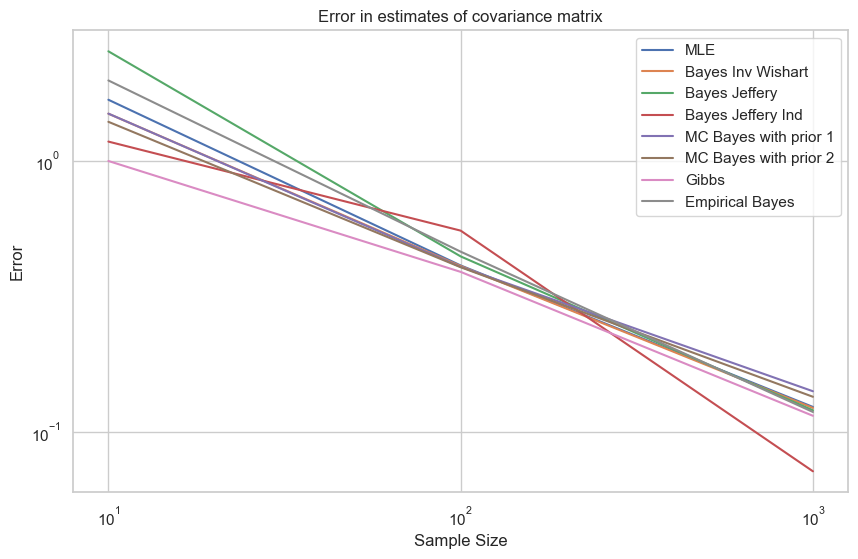

In [234]:
plotError(errors, "Error in estimates of covariance matrix")    